In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

#### UZH rpg urban fisheye

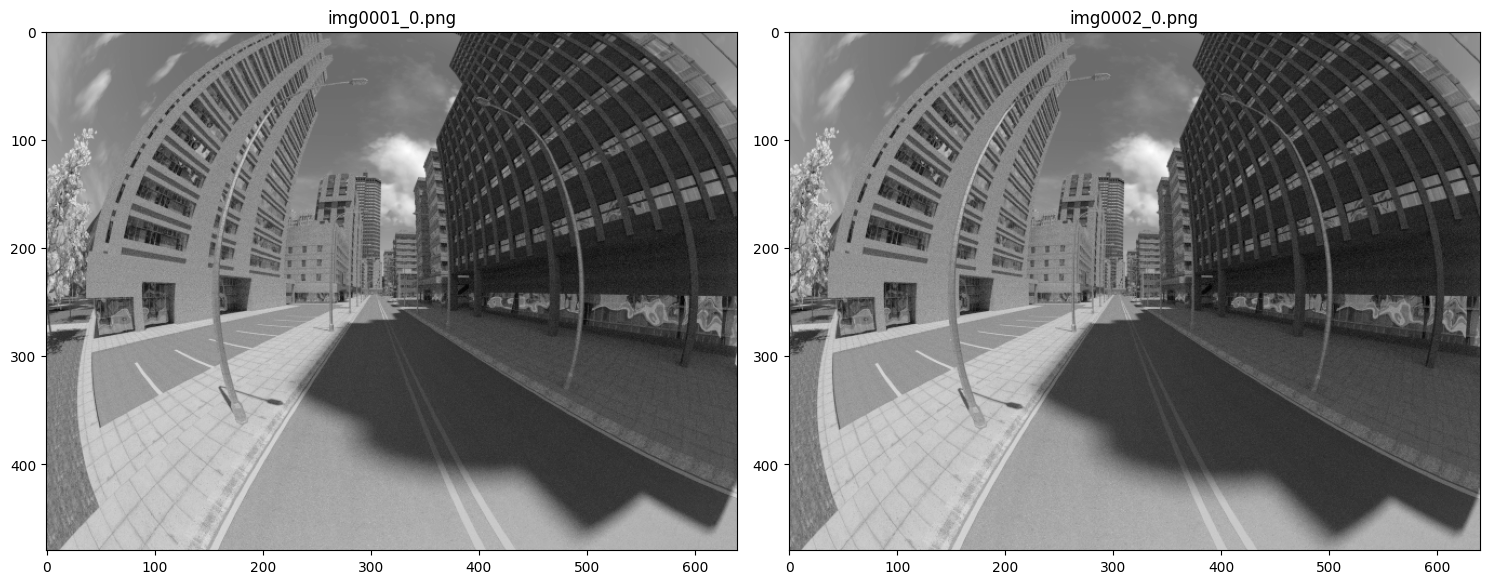

In [17]:
# for intrinsic parameters (https://github.com/zhangzichao/omni_cam/blob/master/test/ocam_param.txt)

image0_filename = "../datasets/UZH/rpg_urban_fisheye/data/img0001_0.png"
image1_filename = "../datasets/UZH/rpg_urban_fisheye/data/img0002_0.png"

image0 = cv2.imread(image0_filename, cv2.IMREAD_GRAYSCALE)
image1 = cv2.imread(image1_filename, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image0, cmap='gray')
plt.title(image0_filename.split('/')[-1])

plt.subplot(1, 2, 2)
plt.imshow(image1, cmap='gray')
plt.title(image1_filename.split('/')[-1])

plt.tight_layout()
plt.show()

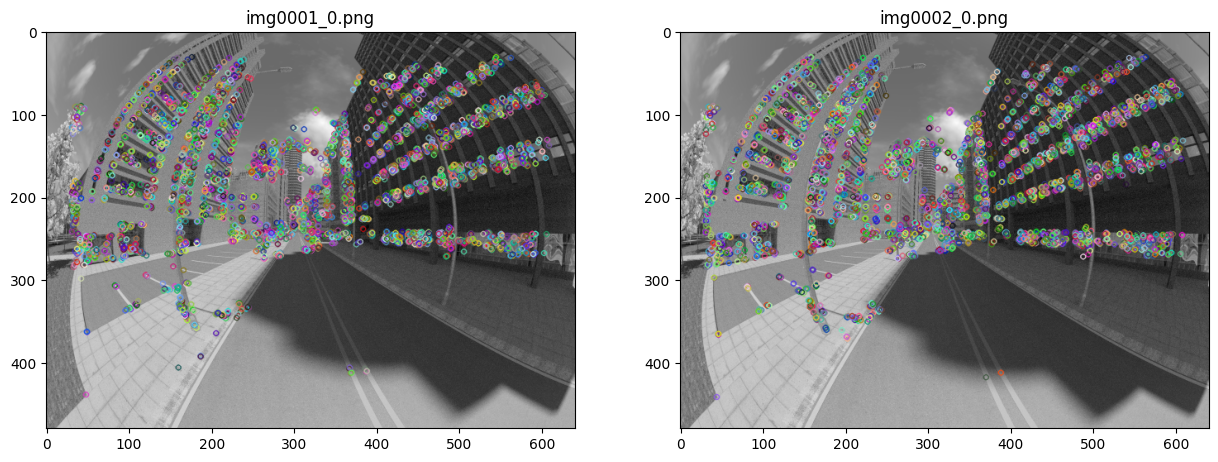

In [16]:
orb = cv2.ORB.create(nfeatures=5000)

kps0, desc0 = orb.detectAndCompute(image0, None)
kps1, desc1 = orb.detectAndCompute(image1, None)

image0_kp = image0.copy()
image0_kp = cv2.drawKeypoints(image0_kp, kps0, None)
image1_kp = image1.copy()
image1_kp = cv2.drawKeypoints(image1_kp, kps1, None)


plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image0_kp)
plt.title(image0_filename.split('/')[-1])

plt.subplot(1, 2, 2)
plt.imshow(image1_kp)
plt.title(image1_filename.split('/')[-1])

plt.show()

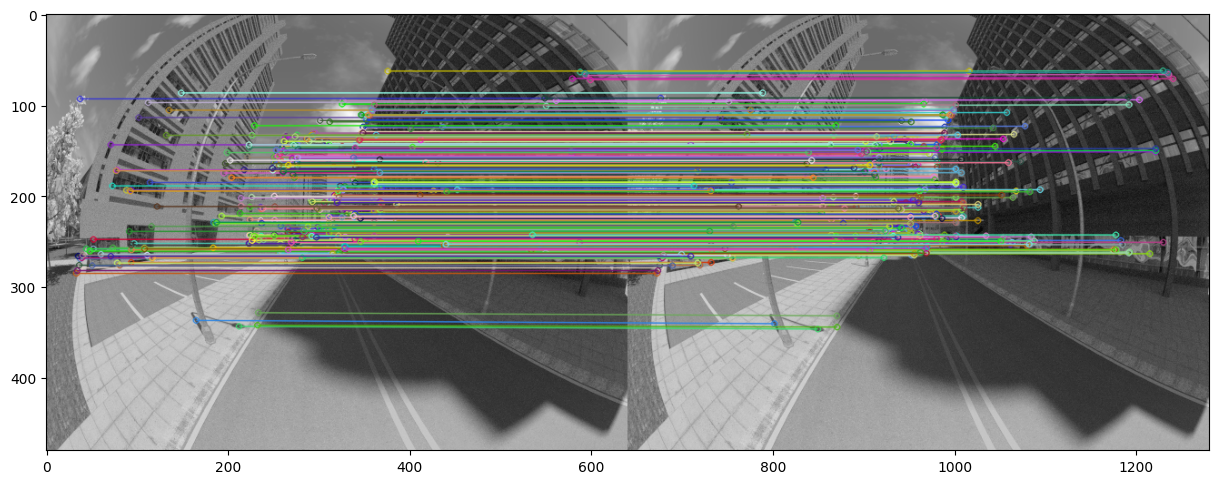

In [29]:
bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING)

matches = bf_matcher.match(desc0, desc1)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 10 matches.
image_matches = cv2.drawMatches(image0,kps0,image1,kps1,matches[:500],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.figure(figsize=(15, 10))
plt.imshow(image_matches),plt.show()
plt.show()

#### KITTI-360 fisheye

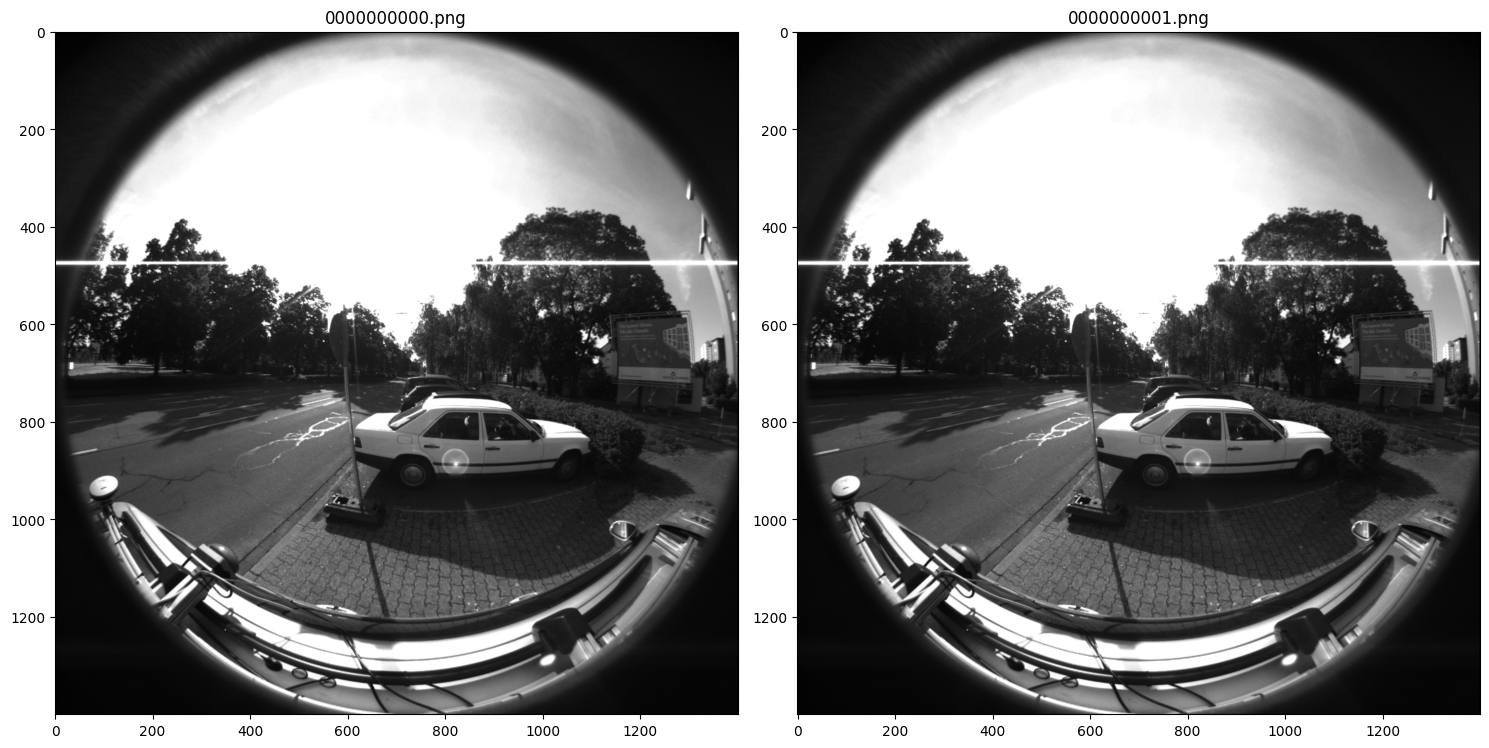

In [2]:
kitti360_image0_filename = "../datasets/KITTI-360/data/2013_05_28_drive_0000_sync/image_02/0000000000.png"
kitti360_image1_filename = "../datasets/KITTI-360/data/2013_05_28_drive_0000_sync/image_02/0000000001.png"

k360_img0 = cv2.imread(kitti360_image0_filename, cv2.IMREAD_GRAYSCALE)
k360_img1 = cv2.imread(kitti360_image1_filename, cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(k360_img0, cmap='gray')
plt.title(kitti360_image0_filename.split('/')[-1])

plt.subplot(1, 2, 2)
plt.imshow(k360_img1, cmap='gray')
plt.title(kitti360_image1_filename.split('/')[-1])

plt.tight_layout()
plt.show()

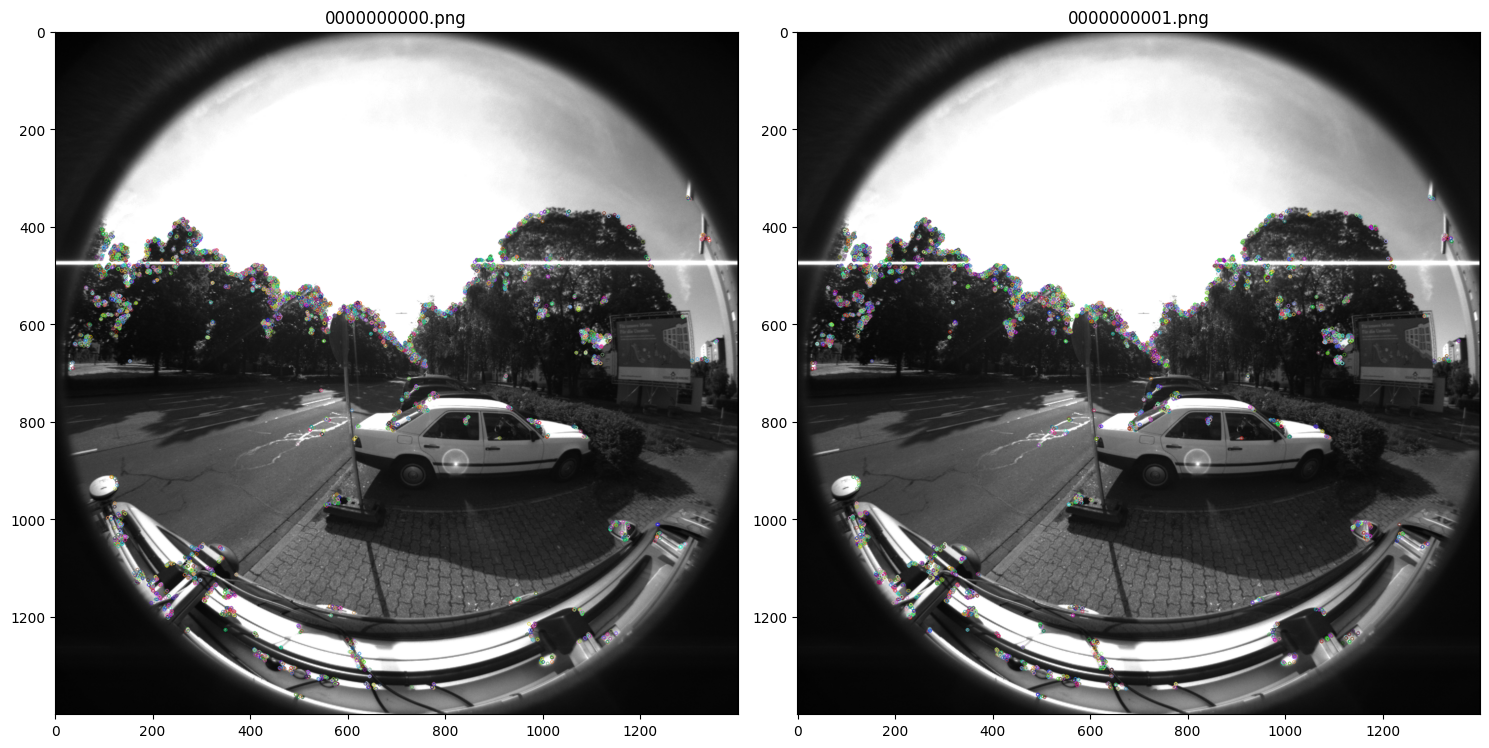

In [3]:
k360_orb = cv2.ORB.create(nfeatures=5000)

k360_kps0, k360_desc0 = k360_orb.detectAndCompute(k360_img0, None)
k360_kps1, k360_desc1 = k360_orb.detectAndCompute(k360_img1, None)

k360_img0_kp = k360_img0.copy()
k360_img0_kp = cv2.drawKeypoints(k360_img0_kp, k360_kps0, None)

k360_img1_kp = k360_img1.copy()
k360_img1_kp = cv2.drawKeypoints(k360_img1_kp, k360_kps1, None)


plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(k360_img0_kp)
plt.title(kitti360_image0_filename.split('/')[-1])

plt.subplot(1, 2, 2)
plt.imshow(k360_img1_kp)
plt.title(kitti360_image1_filename.split('/')[-1])

plt.tight_layout()
plt.show()

In [5]:
# KITTI-360 camera2 intrinsic parameters (datasets/KITTI-360/calibration/image_02.yaml)
xi = 2.2134047507854890e+00
# xi = 1.0
k1, k2 = 1.6798235660113681e-02, 1.6548773243373522e+00
p1, p2 = 4.2223943394772046e-04, 4.2462134260997584e-04
gamma1, gamma2 = 1.3363220825849971e+03, 1.3357883350012958e+03
u0, v0 = 7.1694323510126321e+02, 7.0576498308221585e+02

k360_K = np.array([[gamma1,      0, u0],
                   [     0, gamma2, v0],
                   [     0,      0, 1]])
k360_D = np.array([k1, k2, p1, p2])
k360_xi = np.array([xi])

In [4]:
omnidir_undist_flags = [cv2.omnidir.RECTIFY_PERSPECTIVE, cv2.omnidir.RECTIFY_CYLINDRICAL, cv2.omnidir.RECTIFY_LONGLATI, cv2.omnidir.RECTIFY_STEREOGRAPHIC]

# k360_undistorted = cv2.omnidir.undistortImage(k360_img0, k360_K, k360_D, k360_xi, omnidir_undist_flags[0])
k360_undist_img0 = cv2.omnidir.undistortImage(k360_img0, k360_K, k360_D, np.array([1.]), omnidir_undist_flags[0])
k360_undist_img1 = cv2.omnidir.undistortImage(k360_img1, k360_K, k360_D, np.array([1.]), omnidir_undist_flags[0])

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(k360_undist_img0, cmap='gray')
plt.title(kitti360_image0_filename.split('/')[-1])

plt.subplot(1, 2, 2)
plt.imshow(k360_undist_img1, cmap='gray')
plt.title(kitti360_image1_filename.split('/')[-1])

plt.tight_layout()
plt.show()

AttributeError: module 'cv2' has no attribute 'omnidir'

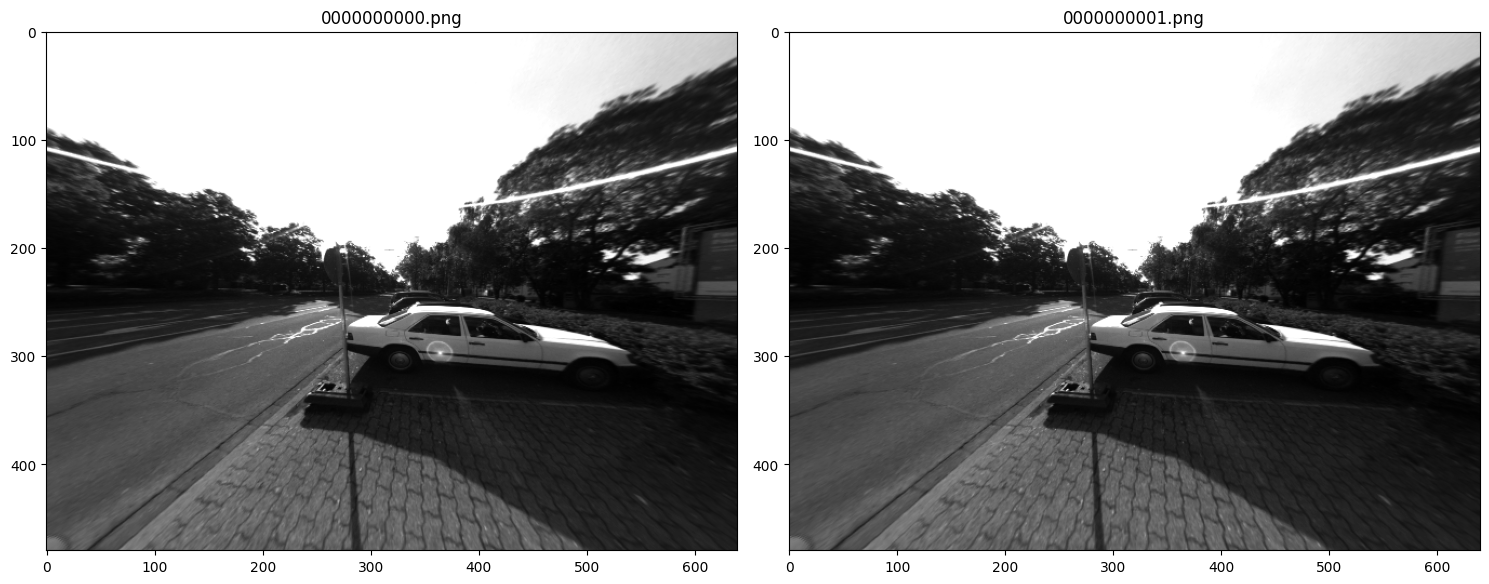

In [358]:
new_size = np.array([640, 480])
# new_size = np.array([1280, 720])
# new_size = np.array([1920, 1080])
focal_length = 300.0
new_K = np.array([[new_size[0]/4, 0, new_size[0]/2],
                  [0, new_size[1]/4, new_size[1]/2],
                  [0, 0, 1]])
# new_K = np.array([[focal_length, 0, new_size[0]/2],
#                   [0, focal_length, new_size[1]/2],
#                   [0, 0, 1]])

map1, map2 = cv2.omnidir.initUndistortRectifyMap(k360_K, k360_D, k360_xi, None, new_K, new_size, cv2.CV_32FC1, omnidir_undist_flags[0])
# map1, map2 = cv2.omnidir.initUndistortRectifyMap(k360_K, k360_D, np.array([1.]), None, new_K, new_size, cv2.CV_32FC1, omnidir_undist_flags[0])

k360_mapped_img0 = cv2.remap(k360_img0, map1, map2, cv2.INTER_LINEAR)
k360_mapped_img1 = cv2.remap(k360_img1, map1, map2, cv2.INTER_LINEAR)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(k360_mapped_img0, cmap='gray')
plt.title(kitti360_image0_filename.split('/')[-1])

plt.subplot(1, 2, 2)
plt.imshow(k360_mapped_img1, cmap='gray')
plt.title(kitti360_image1_filename.split('/')[-1])

plt.tight_layout()
plt.show()

In [336]:
def inv_map(map_x, map_y):
    (row, col) = map_x.shape

    inv_map_x = np.zeros((1400, 1400))
    inv_map_y = np.zeros((1400, 1400))

    for r in range(row):
        for c in range(col):
            inv_map_x[int(map_y[r, c]), int(map_x[r, c])] = c
            inv_map_y[int(map_y[r, c]), int(map_x[r, c])] = r

    return inv_map_x, inv_map_y

inv_map1, inv_map2 = inv_map(map1, map2)

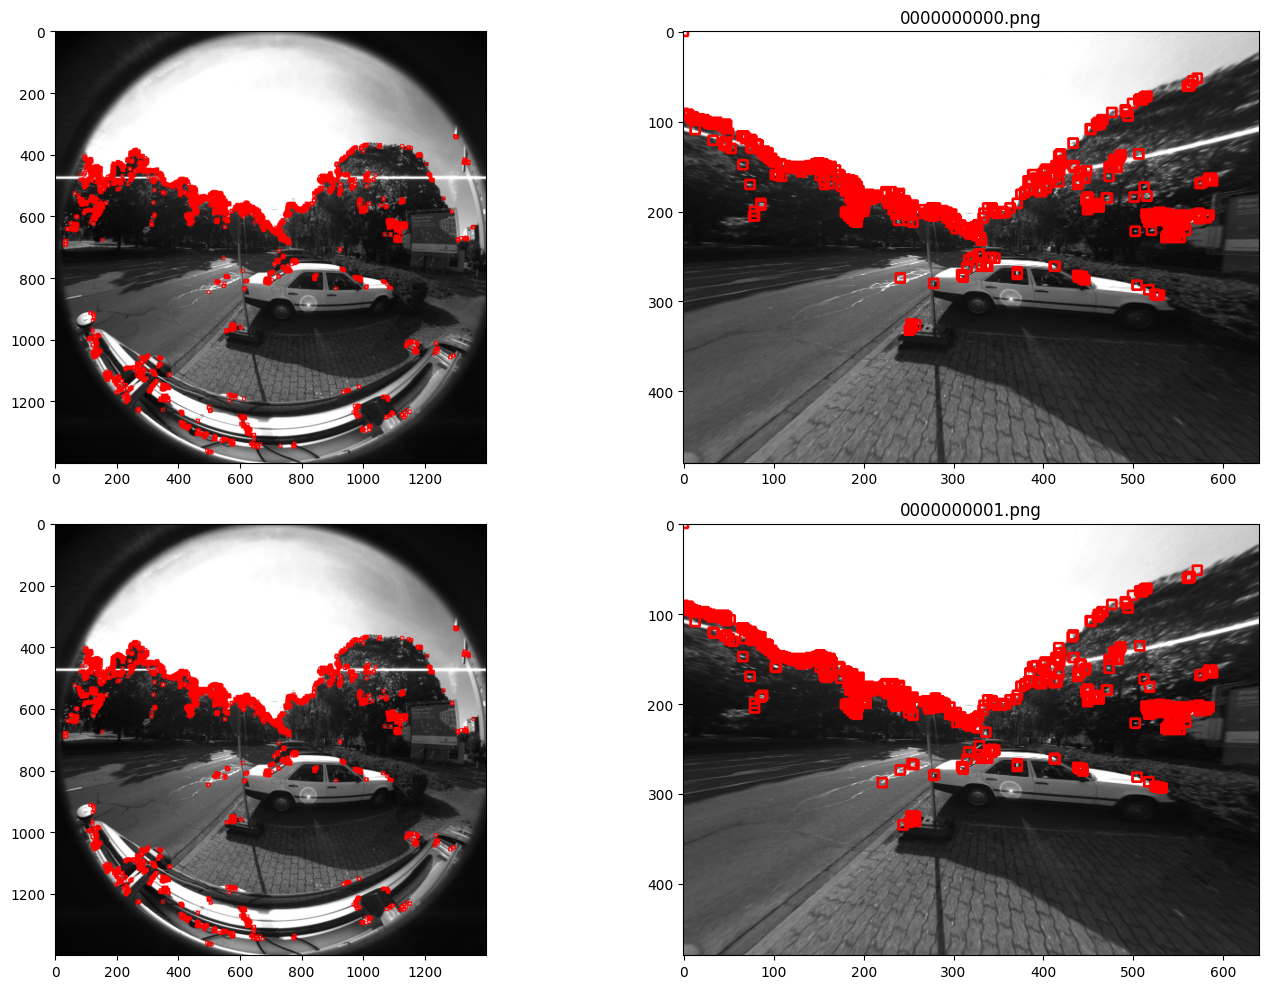

In [337]:
k360_kps0_pt = np.array([kp.pt for kp in k360_kps0])
k360_kps1_pt = np.array([kp.pt for kp in k360_kps1])

# k360_undist_kps0_pt = cv2.undistortPoints(k360_kps0_pt, k360_K, k360_D,None).squeeze()
k360_undist_kps0_pt = np.array([[inv_map1[int(y),int(x)], inv_map2[int(y),int(x)]] for (x,y) in k360_kps0_pt])
k360_undist_kps1_pt = np.array([[inv_map1[int(y),int(x)], inv_map2[int(y),int(x)]] for (x,y) in k360_kps1_pt])

k360_img0_kp2 = cv2.cvtColor(k360_img0, cv2.COLOR_GRAY2RGB)
k360_img0_undist_kp = cv2.cvtColor(k360_mapped_img0, cv2.COLOR_GRAY2RGB)
k360_img1_kp2 = cv2.cvtColor(k360_img1, cv2.COLOR_GRAY2RGB)
k360_img1_undist_kp = cv2.cvtColor(k360_mapped_img1, cv2.COLOR_GRAY2RGB)

for kp_pt in k360_kps0_pt.squeeze():
    k360_img0_kp2 = cv2.rectangle(k360_img0_kp2, (int(kp_pt[0])-5, int(kp_pt[1])-5), (int(kp_pt[0])+5, int(kp_pt[1])+5), (255, 0, 0), 2)
for kp_pt in k360_kps1_pt.squeeze():
    k360_img1_kp2 = cv2.rectangle(k360_img1_kp2, (int(kp_pt[0])-5, int(kp_pt[1])-5), (int(kp_pt[0])+5, int(kp_pt[1])+5), (255, 0, 0), 2)

for kp_pt in k360_undist_kps0_pt:
    k360_img0_undist_kp = cv2.rectangle(k360_img0_undist_kp, (int(kp_pt[0])-5, int(kp_pt[1])-5), (int(kp_pt[0])+5, int(kp_pt[1])+5), (255, 0, 0), 2)
for kp_pt in k360_undist_kps1_pt:
    k360_img1_undist_kp = cv2.rectangle(k360_img1_undist_kp, (int(kp_pt[0])-5, int(kp_pt[1])-5), (int(kp_pt[0])+5, int(kp_pt[1])+5), (255, 0, 0), 2)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(k360_img0_kp2)
plt.subplot(2, 2, 2)
plt.imshow(k360_img0_undist_kp)
plt.title(kitti360_image0_filename.split('/')[-1])

plt.subplot(2, 2, 3)
plt.imshow(k360_img1_kp2)
plt.subplot(2, 2, 4)
plt.imshow(k360_img1_undist_kp)
plt.title(kitti360_image1_filename.split('/')[-1])

plt.tight_layout()
plt.show()

In [362]:
def convert_fisheye_to_rectified_image(fisheye_image):
    # KITTI-360 camera2. intrinsic parameters (datasets/KITTI-360/calibration/image_02.yaml)

    xi = 2.2134047507854890e+00
    # xi = 1.0
    k1, k2 = 1.6798235660113681e-02, 1.6548773243373522e+00
    p1, p2 = 4.2223943394772046e-04, 4.2462134260997584e-04
    gamma1, gamma2 = 1.3363220825849971e+03, 1.3357883350012958e+03
    u0, v0 = 7.1694323510126321e+02, 7.0576498308221585e+02

    k360_K = np.array([[gamma1,      0, u0],
                    [     0, gamma2, v0],
                    [     0,      0, 1]])
    k360_D = np.array([k1, k2, p1, p2])
    k360_xi = np.array([xi])

    new_size = np.array([640, 480])
    focal_length = 300.0
    # new_K = np.array([[718.856, 0, 607.1928],
    #                 [0, 718.856, 185.2157],
    #                 [0, 0, 1]])
    new_K = np.array([[new_size[0]/4, 0, new_size[0]/2],
                    [0, new_size[1]/4, new_size[1]/2],
                    [0, 0, 1]])

    map1, map2 = cv2.omnidir.initUndistortRectifyMap(k360_K, k360_D, k360_xi, None, new_K, new_size, cv2.CV_32FC1, omnidir_undist_flags[0])

    rectified_image = cv2.remap(fisheye_image, map1, map2, cv2.INTER_LINEAR)

    return rectified_image

In [363]:
print(new_K)

[[160.   0. 320.]
 [  0. 120. 240.]
 [  0.   0.   1.]]


In [364]:
img_dir = "/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/"
rect_img_dir = img_dir + "data_rect/"

fisheye_filenames = glob(img_dir + "data_rgb/*.png")
fisheye_filenames.sort()

for filename in fisheye_filenames[:200]:
    fisheye_img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    rect_img = convert_fisheye_to_rectified_image(fisheye_img)

    save_filename = rect_img_dir + filename.split('/')[-1][:-4] + ".png"
    print(save_filename)
    cv2.imwrite(save_filename, rect_img)

/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000000.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000001.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000002.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000003.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000004.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000005.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000006.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000007.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2013_05_28_drive_0000_sync/image_02/data_rect/0000000008.png
/home/kodogyu/Datasets/KITTI-360/data_2d_raw/2

In [344]:
fisheye_filenames[1].split('/')[-1][:-3]

'0000000009.'

##### image pixel to 3D Sphere points

In [25]:
k360_K_inv = np.linalg.inv(k360_K)

half_k360_img0 = cv2.resize(k360_img0, (700, 700), None)
h, w = half_k360_img0.shape

image_sphere_map = np.empty((h, w, 3))
for r in range(h):
    for c in range(w):
        p = np.array([c, r, 1])  # (px, py)
        m = k360_K_inv @ p  # (x, y)

        Zs_xi = k360_xi + np.sqrt(1 + np.power(1-k360_xi, 2) * (m[0]*m[0] + m[1]*m[1]))
        Zs_xi /= np.linalg.norm(m)

        Xs = m[0] * Zs_xi
        Ys = m[1] * Zs_xi
        Zs = Zs_xi - k360_xi

        image_sphere_map[r,c] = np.array([Xs ,Ys, Zs]).ravel()

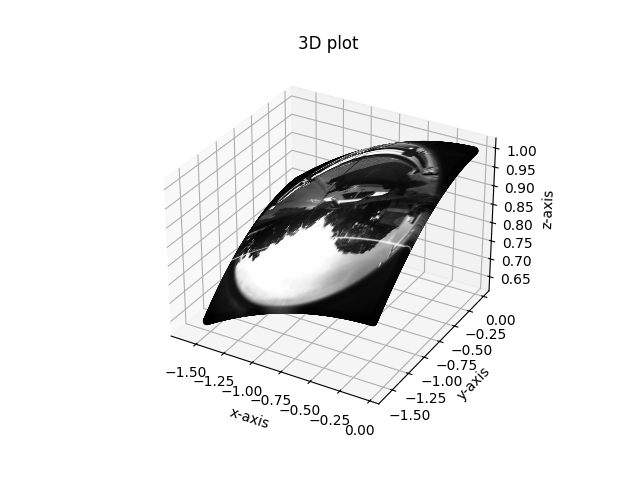

In [43]:
# from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

sphere_x = image_sphere_map[:,:,0].flatten()
sphere_y = image_sphere_map[:,:,1].flatten()
sphere_z = image_sphere_map[:,:,2].flatten()
colors = half_k360_img0.flatten()


# 3D plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
scatter = ax.scatter(sphere_x, sphere_y, sphere_z, c=colors, cmap='gray')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()